<font size="+3" color="GREEN">**Projet 3 : Analyse de séquences génomiques**</font>

<h1> 1 Introduction </h1>

$\quad$ Dans ce projet, nous allons utiliser des outils statistiques nous permettant d’analyser et d'extraire l’information des données génétiques. Pour approcher ce problème on peut considérer un génome comme une chaine de caractères qui contient des mots qui sont significatifs et qui sont lus par la cellule. Il s'agit de détecter ces sites, une tâche importante d'un point de vue biologique. <br>
$\quad$ Notre approche statistique s'appuie sur deux modèles : le premier est un modèle de nucléotides où nous considérons que tous les nucléotides et les occurrences des mots sont indépendants, et le deuxième un modèle de dinucléotides s’appuyant sur les chaines de Markov d'ordre 1.

<font size="+1" color="GREEN">**[P]**</font> **Réalisé par :**

* Merrouche Aymen 
* Sidhoum Imad

<font size="+1" color="GREEN">**[P]**</font> **Spécialité :**
Nous sommes tous les deux en **informatique générale**.

<font size="+1" color="Green">**[P]**</font> **Vocabulaire :** src ="wikipedia"

Le génome, ou rarement génôme, est l'ensemble du matériel génétique d'une espèce codé dans son acide désoxyribonucléique à l'exception de certains virus dont le génome est constitué d'acide ribonucléique. Il contient en particulier tous les gènes codant des protéines ou correspondant à des ARN structurés.

Le séquençage de l'ADN consiste à déterminer l'ordre d'enchaînement des nucléotides d’un fragment d’ADN donné. [réf. souhaitée] Actuellement, la plupart du séquençage d’ADN est réalisée par la méthode de Sanger.

Un gène, en génétique, est une unité de base d'hérédité qui en principe prédétermine un trait précis de la forme d'un organisme vivant, tel que défini en 1909 par Wilhelm Johannsen. Au point de vue physique, un gène est un fragment du locus déterminé d'une séquence d'ADN.

Un promoteur, ou séquence promotrice, est une région de l'ADN située à proximité d'un gène et est indispensable à la transcription de l'ADN en ARN. Le promoteur est la zone de l'ADN sur laquelle se fixe initialement l'ARN polymérase, avant de démarrer la synthèse de l'ARN. Les séquences promotrices sont en général situées en amont du site de démarrage de la transcription1.

Un facteur de transcription est une protéine nécessaire à l'initiation ou à la régulation de la transcription d'un gène dans l'ensemble du vivant (procaryote ou eucaryote). Elle interagit avec l'ADN et l'ARN-polymérase.

<font size="+1" color="GREEN">**[O]**</font> **Import du code :**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math

In [3]:
%load_ext autoreload
%autoreload 2

import code_de_base as utils
import code_ecrit as spr

In [4]:
help(utils)

Help on module code_de_base:

NAME
    code_de_base

FUNCTIONS
    decode_sequence(sequence)
    
    encode_sequence(string)
    
    nucleotide_count(sequence)
    
    nucleotide_frequency(sequence)
    
    read_fasta(fasta_filepath)

DATA
    nucleotide = {'A': 0, 'C': 1, 'G': 2, 'T': 3}
    nucleotide_indetermine = {'A': 0, 'C': 1, 'G': 2, 'N': -1, 'T': 3}

FILE
    c:\users\thinkpad\desktop\git project\projet_3i005_merrouche_sidhoum\code_de_base.py




### Le code que nous avons ajouté :

In [5]:
help(spr)

Help on module code_ecrit:

NAME
    code_ecrit

FUNCTIONS
    code(m, k)
    
    code_inverse(indice, k)
    
    comptage_attendu(frequneces, k, l)
    
    comptage_attendu_markov(frequneces, matrice, k, l)
    
    compte_mot(sequence, k)
    
    concat_sequence(nom_fichier)
    
    detect_mot_chevauchant(m)
        # detect_mot_chevauchant(m)
        # renvoie si oui ou non le mot est chevauchant avec lui meme
        # m : le mot
    
    estime_proba_empirique(dico, l, k, n)
    
    estime_proba_empirique_naive(l, k, n, frequences)
    
    frequence_nucleotide(nom_fichier)
    
    logproba(liste_entiers, m)
    
    logproba_optimale(liste_comptage, m)
    
    nb_occurence(sequence, mot)
    
    nombre_nucleotide_liste(nom_fichier)
    
    nombre_nucleotide_total(nom_fichier)
    
    proba_markov(m, frequences, matrice)
    
    simulation_M(sequence)
    
    simulation_dinucleotide(M, frequence, l)
    
    simule_sequence(lg, m)

FILE
    c:\users\thinkpad\desktop\g

<font size="+1" color="BLUE">**[I]**</font> **Email : aymerrouche@gmail.com**

<h1> 2 Préliminaires : données et lecture des fichiers </h1>

<font size="+1" color="GREEN">**[R]**</font> **Nombre de
nucléotides que compte les chromosomes de S.cerevisae donnés  :**

In [6]:
nom_fichier = 'yeast_s_cerevisae_genomic_chr1-4.fna'

In [7]:
intermediate = utils.read_fasta(nom_fichier)
print("Le nombre de séquences dans ",nom_fichier," est de : ",len(intermediate))

Le nombre de séquences dans  yeast_s_cerevisae_genomic_chr1-4.fna  est de :  4


In [8]:
print("Nombre de nucléotides dans chaque séquence :")
for sequence in intermediate:
    print("séquence ",sequence," ",utils.nucleotide_count(intermediate[sequence]))

Nombre de nucléotides dans chaque séquence :
séquence  >NC_001133.9 Saccharomyces cerevisiae S288c chromosome I, complete sequence
   [59043, 41019, 41611, 58814]
séquence  >NC_001134.8 Saccharomyces cerevisiae S288c chromosome II, complete sequence
   [212499, 144544, 142052, 214569]
séquence  >NC_001135.5 Saccharomyces cerevisiae S288c chromosome III, complete sequence
   [82833, 57146, 54745, 80982]
séquence  >NC_001136.10 Saccharomyces cerevisiae S288c chromosome IV, complete sequence
   [399967, 263234, 264755, 398040]


In [9]:
nombre_nucleotide_total_yeast = spr.nombre_nucleotide_total(nom_fichier)
nombre_nucleotide_liste_yeast = spr.nombre_nucleotide_liste(nom_fichier)
print("Le nombre total de nucleotides dans ",nom_fichier," est de : ",nombre_nucleotide_total_yeast)
print("Le nombre total de nucleotides par type dans ",nom_fichier," est de : ",nombre_nucleotide_liste_yeast)

Le nombre total de nucleotides dans  yeast_s_cerevisae_genomic_chr1-4.fna  est de :  2515853
Le nombre total de nucleotides par type dans  yeast_s_cerevisae_genomic_chr1-4.fna  est de :  [754342 505943 503163 752405]


<font size="+1" color="GREEN">**[R]**</font> **Frequence de
nucléotides que compte les chromosomes de S.cerevisae donnés  :**

In [10]:
print("Frequence de nucleotides dans chaque sequence :")
for sequence in intermediate:
    print("séquence ",sequence," ",utils.nucleotide_frequency(intermediate[sequence]))

Frequence de nucleotides dans chaque sequence :
séquence  >NC_001133.9 Saccharomyces cerevisiae S288c chromosome I, complete sequence
   [0.2944979  0.20459681 0.20754962 0.29335568]
séquence  >NC_001134.8 Saccharomyces cerevisiae S288c chromosome II, complete sequence
   [0.29775777 0.20253789 0.19904605 0.30065829]
séquence  >NC_001135.5 Saccharomyces cerevisiae S288c chromosome III, complete sequence
   [0.3004396  0.20727151 0.19856296 0.29372593]
séquence  >NC_001136.10 Saccharomyces cerevisiae S288c chromosome IV, complete sequence
   [0.30163515 0.19851794 0.19966501 0.3001819 ]


In [11]:
frequence_nucleotide_yeast = spr.frequence_nucleotide('yeast_s_cerevisae_genomic_chr1-4.fna')
print("La frequence total de nucleotides dans ",nom_fichier," est de : ",frequence_nucleotide_yeast)

La frequence total de nucleotides dans  yeast_s_cerevisae_genomic_chr1-4.fna  est de :  [0.29983548 0.20110197 0.19999698 0.29906557]


<font size="+1" color="GREEN">**[R]**</font> **La log-probabilité
d’une séquence, étant donné les fréquences des lettres  :**

In [12]:
spr.logproba([0,2,1,3,0],spr.frequence_nucleotide('yeast_s_cerevisae_genomic_chr1-4.fna'))

-6.82953132725741

In [13]:
# version optimisé
spr.logproba_optimale([2,1,1,1],spr.frequence_nucleotide('yeast_s_cerevisae_genomic_chr1-4.fna'))

-6.82953132725741

In [14]:
logproba_yeast = spr.logproba_optimale(nombre_nucleotide_liste_yeast,frequence_nucleotide_yeast)
print("la logproba de ",nom_fichier," est : ",logproba_yeast)

la logproba de  yeast_s_cerevisae_genomic_chr1-4.fna  est :  -3438164.4626395022


<h1>3 Annotation des régions promoteurs</h1>

<h2>3.1 Description Empirique, préliminaires</h2>

In [15]:
# on charge les differents fichier pho,gal et met sous forme de liste d'entier de leurs séquences concaténées
gal_nom = 'regulatory_seqs_GAL.fasta'
pho_nom = 'regulatory_seq_PHO.fasta'
met_nom = 'regulatory_seqs_MET.fasta'
pho = spr.concat_sequence(pho_nom)
gal = spr.concat_sequence(gal_nom)
met = spr.concat_sequence(met_nom)
print(pho[0:100])

[3, 3, 3, 3, 0, 1, 0, 1, 0, 3, 1, 2, 2, 0, 1, 3, 2, 0, 3, 0, 0, 2, 3, 3, 0, 1, 3, 0, 1, 3, 2, 1, 0, 1, 0, 3, 3, 2, 2, 1, 0, 3, 3, 0, 2, 1, 3, 0, 2, 2, 0, 2, 2, 2, 1, 0, 3, 1, 1, 0, 0, 2, 3, 0, 0, 3, 0, 0, 3, 3, 2, 1, 2, 0, 2, 0, 0, 0, 1, 2, 3, 2, 0, 1, 1, 1, 0, 0, 1, 3, 3, 3, 2, 3, 3, 2, 3, 0, 2, 2]


<font size="+1" color="GREEN">**[R]**</font> **Compter tous les mots d’une taille k dans un génome  :**

<b> A- code(m, k) :</b>

In [16]:
mot = "TACAGTAGAT"
param_liste = utils.encode_sequence(mot)
print("code  généré : ",spr.code(param_liste,len(param_liste)))

code  généré :  805667


<b> B- code_inverse(indice, k) :</b>

In [17]:
result_liste = spr.code_inverse(805667,len(param_liste))
print("mot aprés codage inverse : ",utils.decode_sequence(result_liste))

mot aprés codage inverse :  TACAGTAGAT


<b> C- compte_mot(sequence,k) :</b>

In [18]:
# les clefs du dictionnaire sont les codes des mots et les valeurs sont le nombre d'occurences
resultat = spr.compte_mot([3,3,3,1,2,1,2,4],2)
print(resultat)
print("le nombre de mots distincts : ",len(resultat))
print("le nombre total des mots : ",sum(resultat.values()))

{15: 2, 13: 1, 6: 2, 9: 1, 12: 1}
le nombre de mots distincts :  5
le nombre total des mots :  7


<font size="+1" color="GREEN">**[R]**</font> **Le nombre attendu d’occurrences pour un mot w dans une séquence de longueur l  ,connaissant les fréquences des lettres dans le génome:**

Soit un génome de longueur $l$ : <br>
Si on a les fréquences des lettres dans le génome $frequency$, si on suppose que les occurrences successives des lettres sont indépendantes(et donc la probabilité d'une lettre est sa fréquence) et que les occurences des mots sont indépendantes,alors la probabilité d'apparition du mot $m$ de longueur $k$ est :<br>
$$P(m) = \prod_{i=1}^k frequency(m[i])$$
Or :<br>
$$logproba(frequency,m) = log(\prod_{i=1}^k frequency(m[i]))$$
Donc :<br>
$$e^{logproba(frequency,m)} = e^{log(\prod_{i=1}^k frequency(m[i]))} = \prod_{i=1}^k frequency(m[i]) = P(m)$$
On a aussi que le nombre de mot de taille $k$ avec chevauchement dans notre séquence de taille $l$ est de $l-k+1$ <br>
On en conclut que le nombre attendu $N(m)$ d'occurrences pour un mot $m$ est :
$$N(m) = P(m) \times (l-k+1) = e^{logproba(m,frequences)} \times (l-k+1)$$

In [19]:
# les clefs du dictionnaire sont les codes des mots et les valeurs sont le nombre d'occurences attendues
dico = spr.comptage_attendu([0.2,0.1,0.3,0.4],2,200)
print("la somme des valeurs attendues : ",sum(dico.values()))
print("les valeurs attendues sont : ",dico)

la somme des valeurs attendues :  199.00000000000003
les valeurs attendues sont :  {0: 7.960000000000002, 1: 3.980000000000002, 2: 11.94, 3: 15.920000000000003, 4: 3.980000000000002, 5: 1.9900000000000007, 6: 5.969999999999999, 7: 7.960000000000002, 8: 11.94, 9: 5.969999999999999, 10: 17.909999999999997, 11: 23.880000000000003, 12: 15.920000000000003, 13: 7.960000000000002, 14: 23.880000000000003, 15: 31.840000000000007}


<font size="+1" color="GREEN">**[R]**</font> **Comaparaison entre le comptage réel et le comptage attendu :**

### PHO :

In [20]:
# on récupère la fréquence et la taille de pho
frequence_pho = spr.frequence_nucleotide(pho_nom)
print("frequence : " ,frequence_pho)
taille_pho = spr.nombre_nucleotide_total(pho_nom)
print("nombre de nucleotides : ", taille_pho)

frequence :  [0.33275 0.1985  0.194   0.27475]
nombre de nucleotides :  4000


<Figure size 432x288 with 0 Axes>

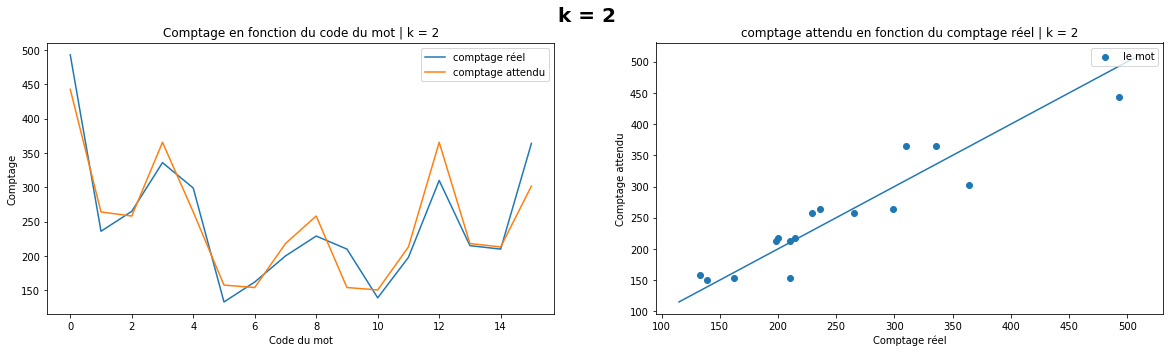

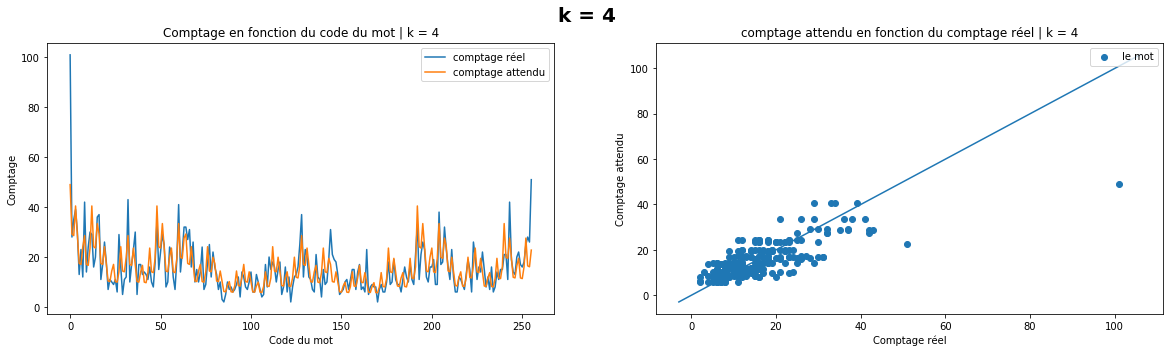

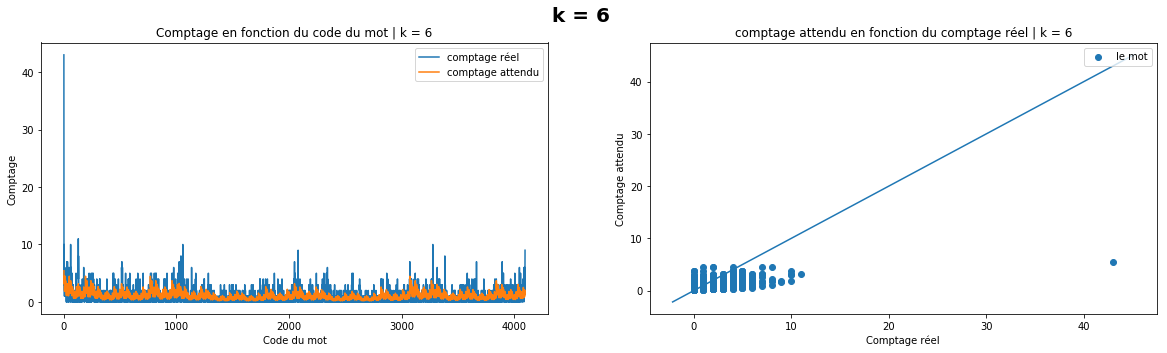

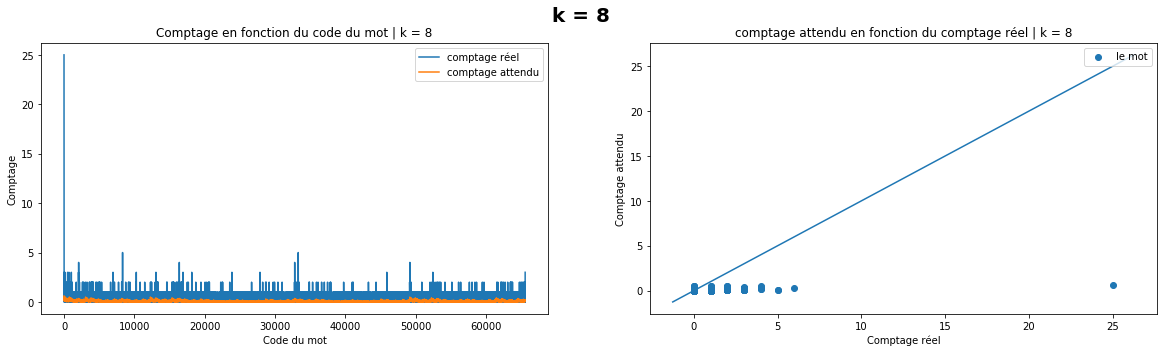

In [21]:
i = 0
# pour chaque valuer de k
for k in [2,4,6,8]:
    # on récupère le comptage réel
    comptage_reel = spr.compte_mot(pho,k)
    # on récupère le comptage attendu
    comptage_attendu = spr.comptage_attendu(frequence_pho,k,taille_pho)
    reel = []
    attendu = []
    mots = []
    # on itére sur les mots pour dessiner les courbes
    for mot in comptage_attendu:
        mots.append(mot)
        if mot in comptage_reel:
            reel.append(comptage_reel[mot])
            attendu.append(comptage_attendu[mot])
        else:
            attendu.append(comptage_attendu[mot])
            reel.append(0)
    # On dessine les figures
    plt.figure(i)
    plt.figure(figsize=(20,5))
    plt.suptitle("k = "+str(k),fontsize=20, fontweight='bold')
    i+=1
    # plot 1
    p1= plt.subplot(121)
    p1.set_title("Comptage en fonction du code du mot | k = "+str(k))
    p1.set_xlabel("Code du mot")
    p1.set_ylabel("Comptage")
    p1.plot(mots, reel,label ="comptage réel" )
    p1.plot(mots, attendu,label ="comptage attendu" )
    p1.legend(loc = "upper right")
    # plot 2
    p2 = plt.subplot(122)
    p2.set_title("comptage attendu en fonction du comptage réel | k = "+str(k))
    p2.set_xlabel("Comptage réel")
    p2.set_ylabel("Comptage attendu")
    p2.scatter(reel, attendu,label ="le mot" )
    lims = [
    np.min([p2.get_xlim(), p2.get_ylim()]),  # min of both axes
    np.max([p2.get_xlim(), p2.get_ylim()]),  # max of both axes
    ]
    p2.plot(lims,lims)
    p2.legend(loc = "upper right")

### GAL :

In [22]:
# on récupère la fréquence et la taille de gal
frequence_gal = spr.frequence_nucleotide(gal_nom)
print("frequence : " ,frequence_gal)
taille_gal = spr.nombre_nucleotide_total(gal_nom)
print("nombre de nucleotides : ", taille_gal)

frequence :  [0.30456491 0.20114123 0.18669757 0.30759629]
nombre de nucleotides :  5608


<Figure size 432x288 with 0 Axes>

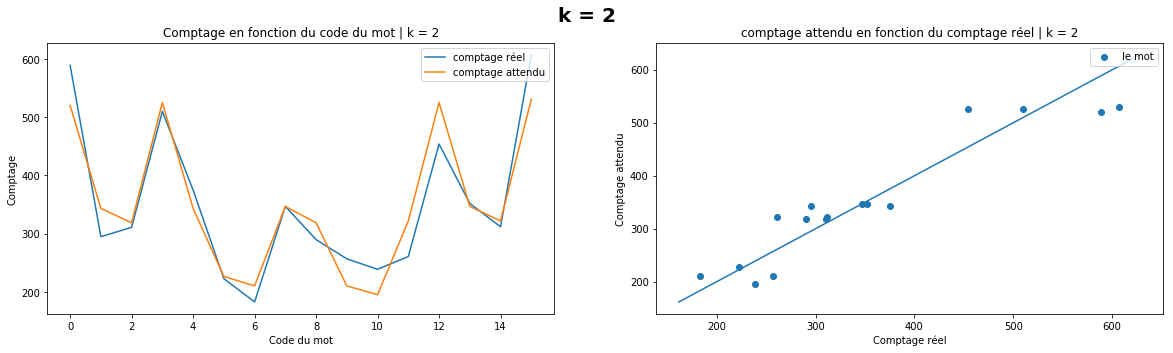

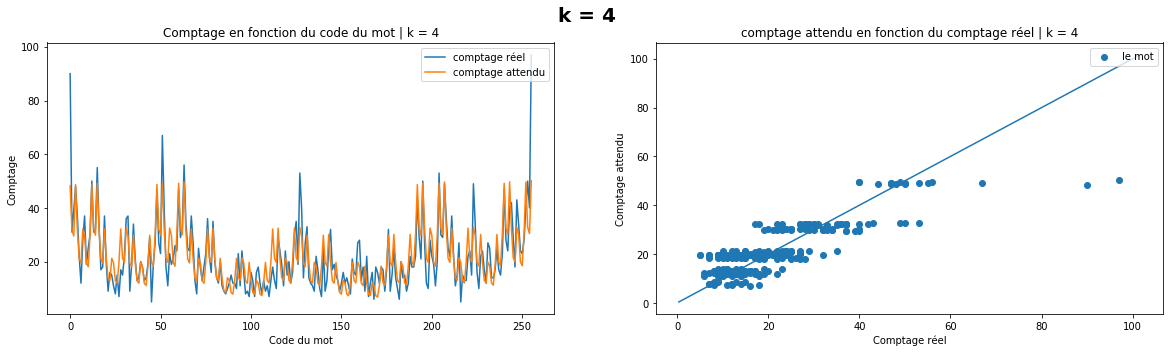

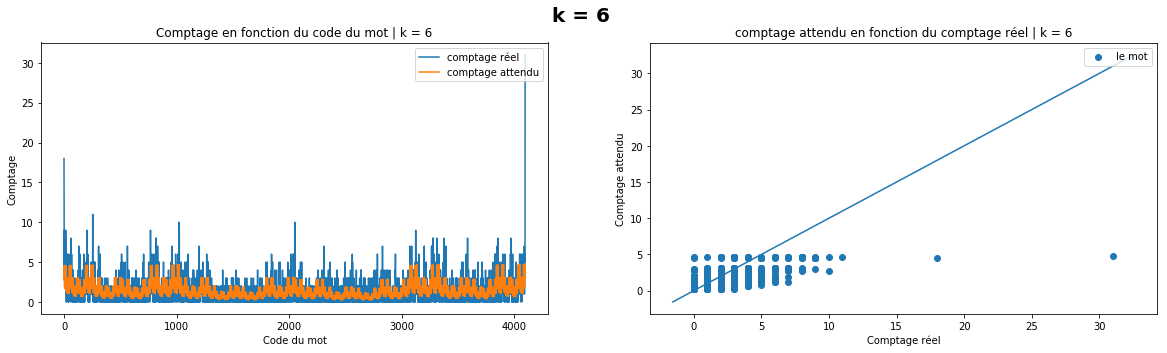

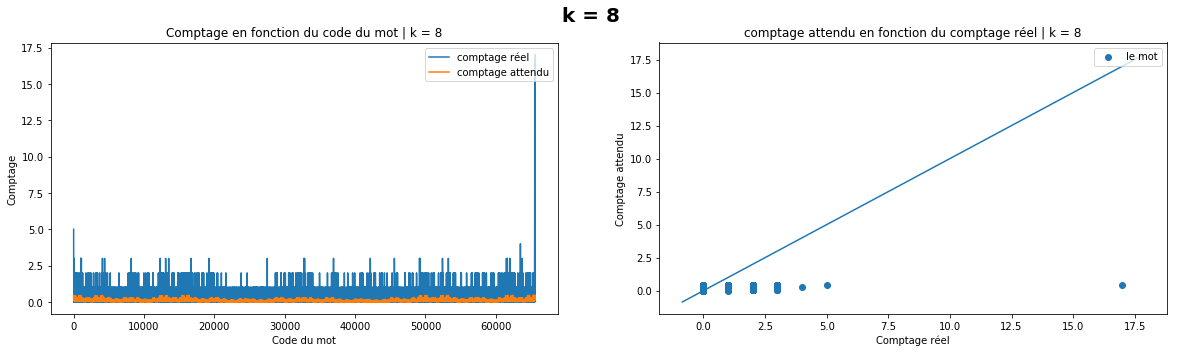

In [23]:
i = 0
# pour chaque valuer de k
for k in [2,4,6,8]:
    # on récupère le comptage réel
    comptage_reel = spr.compte_mot(gal,k)
    # on récupère le comptage attendu
    comptage_attendu = spr.comptage_attendu(frequence_gal,k,taille_gal)
    reel = []
    attendu = []
    mots = []
    # on itére sur les mots pour dessiner les courbes
    for mot in comptage_attendu:
        mots.append(mot)
        if mot in comptage_reel:
            reel.append(comptage_reel[mot])
            attendu.append(comptage_attendu[mot])
        else:
            reel.append(0)
            attendu.append(comptage_attendu[mot])
    # On dessine les figures
    plt.figure(i)
    plt.figure(figsize=(20,5))
    plt.suptitle("k = "+str(k),fontsize=20, fontweight='bold')
    i+=1
    # plot 1
    p1= plt.subplot(121)
    p1.set_title("Comptage en fonction du code du mot | k = "+str(k))
    p1.set_xlabel("Code du mot")
    p1.set_ylabel("Comptage")
    p1.plot(mots, reel,label ="comptage réel" )
    p1.plot(mots, attendu,label ="comptage attendu" )
    p1.legend(loc = "upper right")
    # plot 2
    p2 = plt.subplot(122)
    p2.set_title("comptage attendu en fonction du comptage réel | k = "+str(k))
    p2.set_xlabel("Comptage réel")
    p2.set_ylabel("Comptage attendu")
    p2.scatter(reel, attendu,label ="le mot" )
    lims = [
    np.min([p2.get_xlim(), p2.get_ylim()]),  # min of both axes
    np.max([p2.get_xlim(), p2.get_ylim()]),  # max of both axes
    ]
    p2.plot(lims,lims)
    p2.legend(loc = "upper right")

### MET:

In [24]:
# on récupère la fréquence et la taille de met
frequence_met = spr.frequence_nucleotide(met_nom)
print("frequence : " ,frequence_met)
taille_met = spr.nombre_nucleotide_total(met_nom)
print("nombre de nucleotides : ", taille_met)

frequence :  [0.31888889 0.19111111 0.18222222 0.30777778]
nombre de nucleotides :  7200


<Figure size 432x288 with 0 Axes>

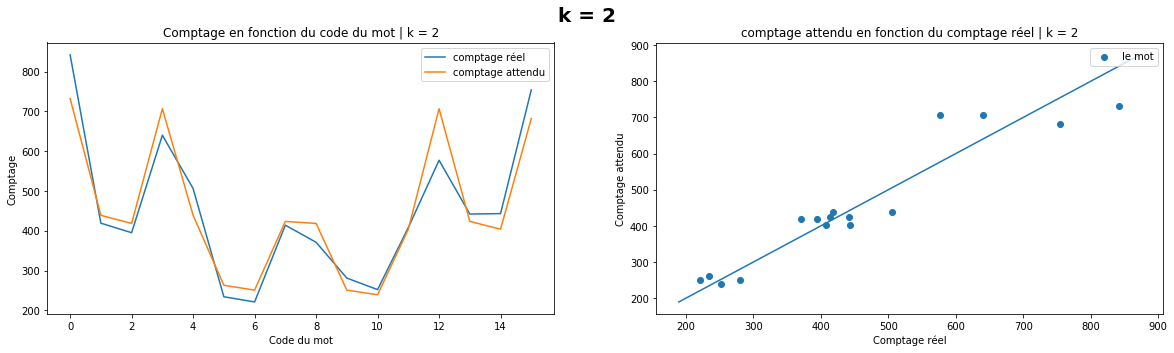

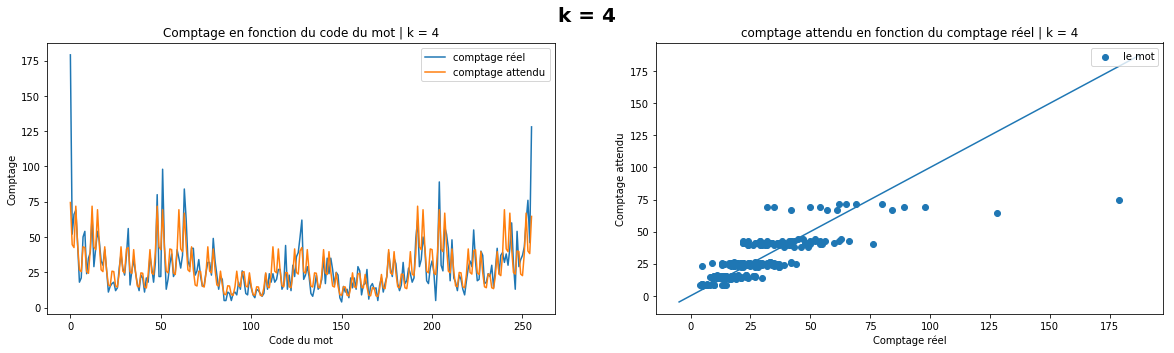

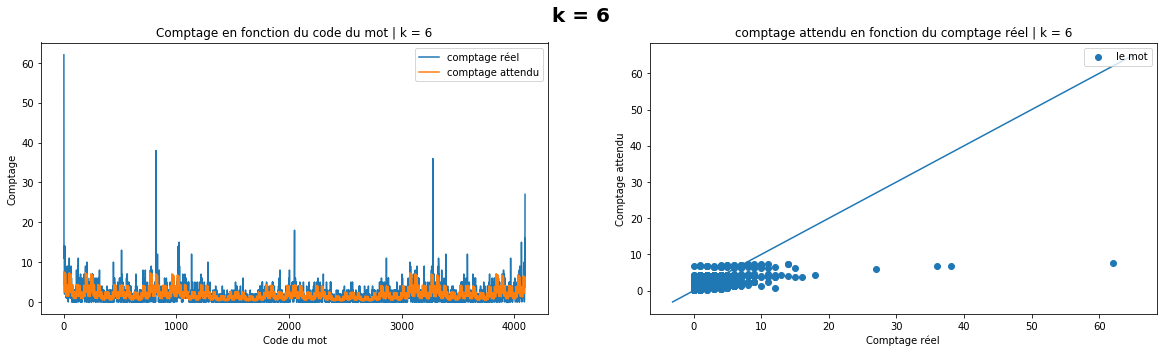

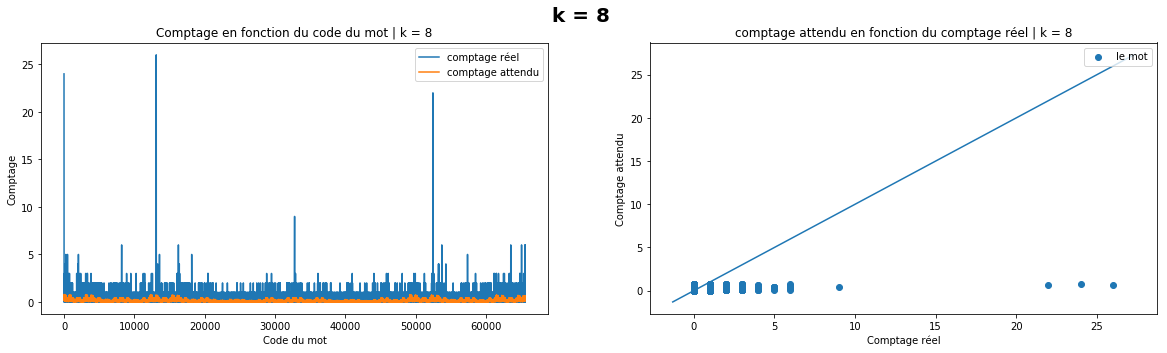

In [25]:
i = 0
# pour chaque valuer de k
for k in [2,4,6,8]:
    # on récupère le comptage réel
    comptage_reel = spr.compte_mot(met,k)
    # on récupère le comptage attendu
    comptage_attendu = spr.comptage_attendu(frequence_met,k,taille_met)
    reel = []
    attendu = []
    mots = []
    maxi = 0
    wor =0
    # on itére sur les mots pour dessiner les courbes
    for mot in comptage_attendu:
        mots.append(mot)
        if mot in comptage_reel:
            if comptage_reel[mot]>maxi:
                maxi = comptage_reel[mot]
                wor =mot
            reel.append(comptage_reel[mot])
            attendu.append(comptage_attendu[mot])
        else:
            reel.append(0)
            attendu.append(comptage_attendu[mot])
    # On dessine les figures
    plt.figure(i)
    plt.figure(figsize=(20,5))
    plt.suptitle("k = "+str(k),fontsize=20, fontweight='bold')
    i+=1
    # plot 1
    p1= plt.subplot(121)
    p1.set_title("Comptage en fonction du code du mot | k = "+str(k))
    p1.set_xlabel("Code du mot")
    p1.set_ylabel("Comptage")
    p1.plot(mots, reel,label ="comptage réel" )
    p1.plot(mots, attendu,label ="comptage attendu" )
    p1.legend(loc = "upper right")
    # plot 2
    p2 = plt.subplot(122)
    p2.set_title("comptage attendu en fonction du comptage réel | k = "+str(k))
    p2.set_xlabel("Comptage réel")
    p2.set_ylabel("Comptage attendu")
    p2.scatter(reel, attendu,label ="le mot" )
    lims = [
    np.min([p2.get_xlim(), p2.get_ylim()]),  # min of both axes
    np.max([p2.get_xlim(), p2.get_ylim()]),  # max of both axes
    ]
    p2.plot(lims,lims)
    p2.legend(loc = "upper right")

### Remarques:
Cette méthode donne de bons résultats pour les petites valeurs de $k$ (2,4) ce qui est logique ; car la relation entre la fréquence d'apparition et la probabilité du mot perd de son sens pour de longs mots (i.e. $P(m) = \prod_{i=1}^k frequency(m[i])$), car on suppose que les occurrences successives des lettres sont indépendantes. En effet pour une valeur de $k=1$ on aura des résultats théoriques identiques à ceux observés. Ce qui met en exergue le fait qu’il existe des séquences de taille $k=6$ et $k=8$ qui apparaissent beaucoup plus souvent de manière très notable en faisant des piques dans les figures ci-dessus, ce sont des mots qui sont significatifs, ou qui sont logiquement plus fréquents que les autres.

<h2>3.2 Simulation de séquences aléatoires</h2>

<font size="+1" color="GREEN">**[R]**</font> **Génèration de séquences aléatoires :**

In [26]:
sequnce_aleatoire = spr.simule_sequence(100, [0.31888889 ,0.19111111 ,0.18222222 ,0.30777778])
print("séquence aleatoire génerée : ",sequnce_aleatoire)
print(utils.decode_sequence(sequnce_aleatoire))
print("on regénère les fréquences à partir de la séquence aléatoire générée : ",utils.nucleotide_frequency(sequnce_aleatoire))

séquence aleatoire génerée :  [2, 1, 3, 3, 0, 0, 1, 3, 0, 0, 3, 0, 2, 1, 1, 3, 0, 0, 0, 2, 0, 0, 1, 0, 3, 1, 0, 3, 0, 2, 3, 3, 0, 1, 2, 2, 2, 1, 0, 0, 0, 2, 0, 3, 3, 3, 0, 1, 1, 3, 1, 1, 1, 3, 2, 3, 3, 1, 2, 3, 3, 2, 3, 3, 3, 3, 2, 2, 0, 1, 1, 0, 0, 3, 0, 3, 0, 2, 0, 2, 3, 2, 0, 1, 1, 3, 0, 0, 1, 3, 2, 0, 2, 3, 0, 3, 3, 0]
GCTTAACTAATAGCCTAAAGAACATCATAGTTACGGGCAAAGATTTACCTCCCTGTTCGTTGTTTTGGACCAATATAGAGTGACCTAACTGAGTATTA
on regénère les fréquences à partir de la séquence aléatoire générée :  [0.31632653 0.19387755 0.18367347 0.30612245]


<font size="+1" color="GREEN">**[R]**</font> **Comparer le comptage attendu et le comptage observé, en utilisant la simulation de sequences :**

In [27]:
# on génere une séquence aléatoire et on recupére ses fréquences et sa taille
sequnce_aleatoire = spr.simule_sequence(7200, [0.31888889 ,0.19111111 ,0.18222222 ,0.30777778])
frequence_simu = utils.nucleotide_frequency(sequnce_aleatoire)
print("fréquence : " ,frequence_simu)
taille_simu = len(sequnce_aleatoire)
print("taille : ",taille_simu)

fréquence :  [0.31897749 0.19102528 0.18213393 0.3078633 ]
taille :  7198


<Figure size 432x288 with 0 Axes>

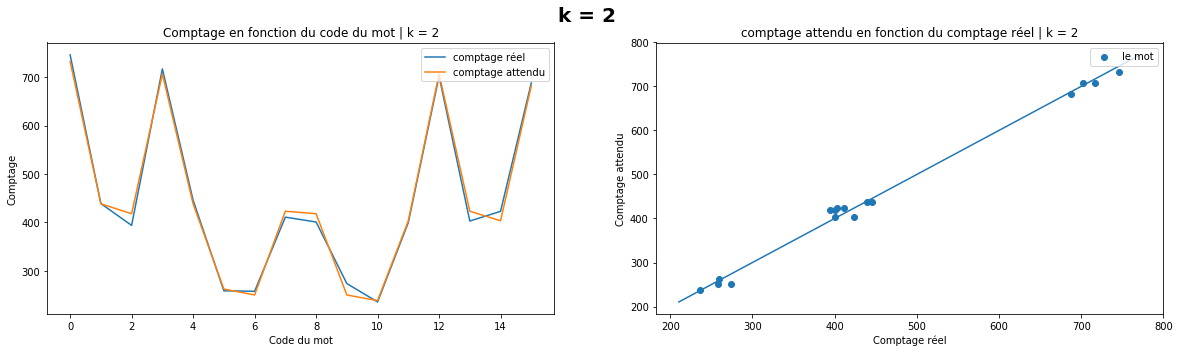

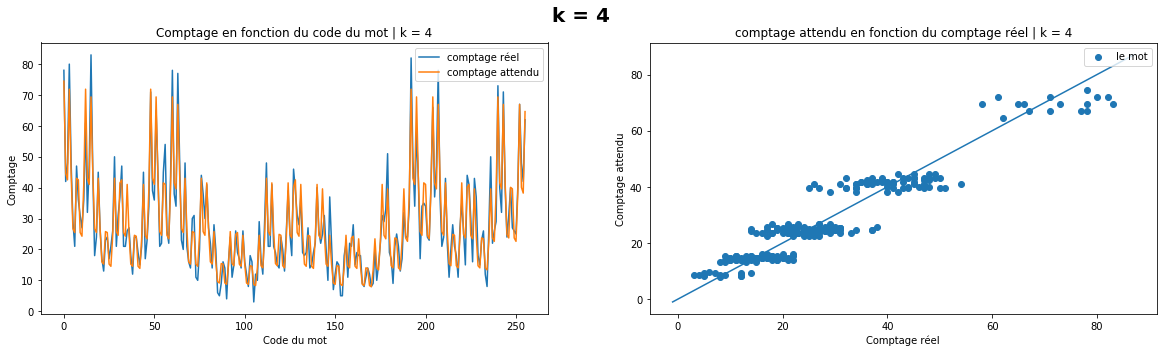

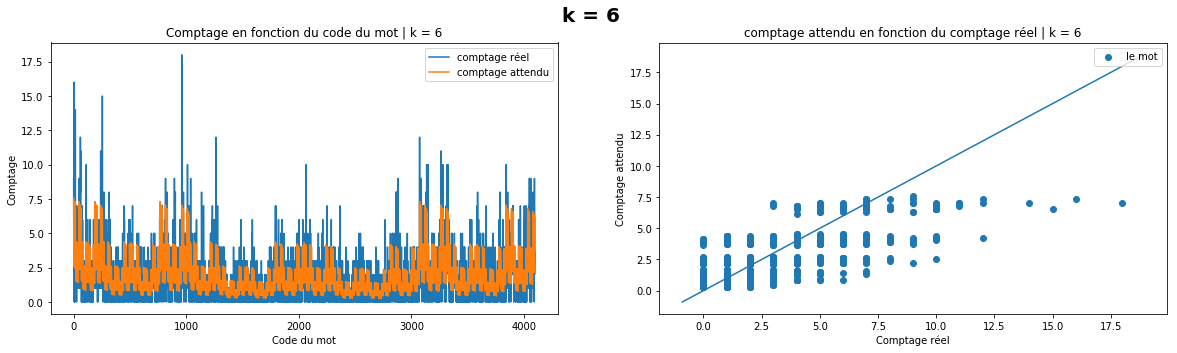

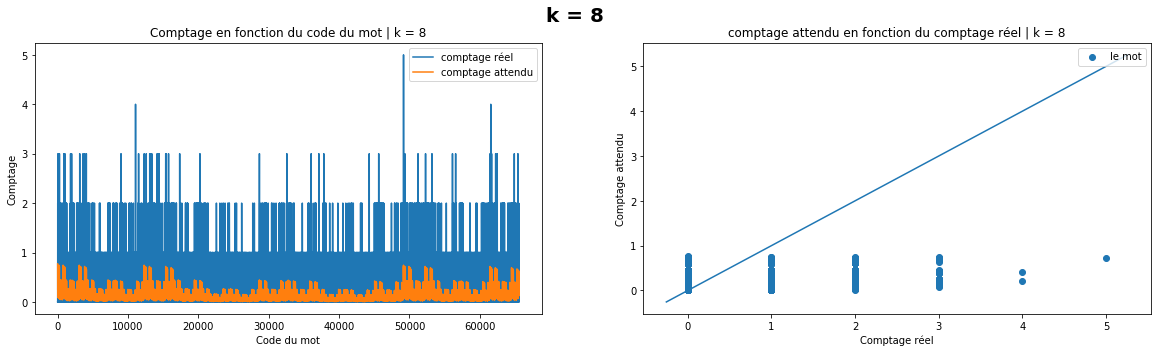

In [28]:
i = 0
# pour chaque valuer de k
for k in [2,4,6,8]:
    # on récupère le comptage réel
    comptage_reel = spr.compte_mot(sequnce_aleatoire,k)
    # on récupère le comptage attendu
    comptage_attendu = spr.comptage_attendu(frequence_simu,k,taille_simu)
    reel = []
    attendu = []
    mots = []
    # on itére sur les mots pour dessiner les courbes
    for mot in comptage_attendu:
        mots.append(mot)
        if mot in comptage_reel:
            reel.append(comptage_reel[mot])
            attendu.append(comptage_attendu[mot])
        else:
            reel.append(0)
            attendu.append(comptage_attendu[mot])
    # On dessine les figures
    plt.figure(i)
    plt.figure(figsize=(20,5))
    plt.suptitle("k = "+str(k),fontsize=20, fontweight='bold')
    i+=1
    # plot 1
    p1= plt.subplot(121)
    p1.set_title("Comptage en fonction du code du mot | k = "+str(k))
    p1.set_xlabel("Code du mot")
    p1.set_ylabel("Comptage")
    p1.plot(mots, reel,label ="comptage réel" )
    p1.plot(mots, attendu,label ="comptage attendu" )
    p1.legend(loc = "upper right")
    # plot 2
    p2 = plt.subplot(122)
    p2.set_title("comptage attendu en fonction du comptage réel | k = "+str(k))
    p2.set_xlabel("Comptage réel")
    p2.set_ylabel("Comptage attendu")
    p2.scatter(reel, attendu,label ="le mot" )
    lims = [
    np.min([p2.get_xlim(), p2.get_ylim()]),  # min of both axes
    np.max([p2.get_xlim(), p2.get_ylim()]),  # max of both axes
    ]
    p2.plot(lims,lims)
    p2.legend(loc = "upper right")

### Remarques:
Cette méthode donne de bons résultats pour les petites valeurs de $k$ (2,4) ce qui est logique, car la relation entre la fréquence d'apparition et la probabilité du mot perd de son sens pour de longs mots (i.e. $P(m) = \prod_{i=1}^k frequency(m[i])$), ça donne de meilleurs résultats que dans le cas réel (en utilisant PHO et MET et GAL) , sachant que cette séquence aléatoire utilisée est une imitation de « GAL », et donc les positions sont encore plus liées dans le cas réel. Ce qui veut dire que dans ce cas on a éliminé les mots qui sont récurrents naturellement. Cependant ici on ne remarque pas de piques singuliers comme précédemment.

<font size="+1" color="GREEN">**[R]**</font> **Estimer la probabilité d’observer un mot un certain nombre
n de fois dans une séquence de longueur l (i.e. $P_{emp}(N>=n)$) :**

In [29]:
# cette focntion calcule le nombre d'occcurence d'un mot dans une sequence
spr.nb_occurence([1,0,1,0,2,4],[0,2,4])

1

In [30]:
# pour s séquence aléaroire
s = 100
# on fixe la valeur de n
n = 6
dico = {'ATCTGC' : 0, 'ATATAT' : 0, 'TTTAAA' : 0,'AAAAAA' : 0}
nb_apparition = {'ATCTGC' : 0, 'ATATAT' : 0, 'TTTAAA' : 0,'AAAAAA'  : 0}
nb_apparition_attendu = {'ATCTGC' : 0, 'ATATAT' : 0, 'TTTAAA' : 0,'AAAAAA'  : 0}
# on recuperera dans la boucle : le comptage réel, le comptage attendu, le nombre de simulations couronées de succées (N>=n) 
# pour chaque simulation
for i in range(s):
    sequence_aleatoire = []
    frequences_aleatoires = []
    # On genere des fréquences aléatoirement
    frequences_aleatoires = [random.random() for i in range(1,5)]
    frequences_aleatoires = np.array(frequences_aleatoires)
    frequences_aleatoires = frequences_aleatoires / sum(frequences_aleatoires)
    #On genre une sequence aleatoire qui correspond à cette fréquence
    sequence_aleatoire = spr.simule_sequence(10000, frequences_aleatoires)
    # comptage attendu pour cette simulation
    comptage_attendu_simu = spr.comptage_attendu(frequences_aleatoires,6,len(sequence_aleatoire))
    for word in dico:
        # nombre d'apparitions du mot dans la séquence aléatoire
        nb = spr.nb_occurence(sequence_aleatoire,utils.encode_sequence(word))
        # on met à jour le nombre d'apparitions attendu et réel
        nb_apparition[word] +=nb
        nb_apparition_attendu[word] +=comptage_attendu_simu[spr.code(utils.encode_sequence(word),6)]
        # si c'est une simulation à succées on met à jour 
        if nb >= n :
            dico[word] +=1
# il s'agit de l'ésperance empirique
for d in dico:
    dico[d] = dico[d] / s

**Les probabilités empiriques sont :**

In [31]:
print(dico)

{'ATCTGC': 0.03, 'ATATAT': 0.24, 'TTTAAA': 0.18, 'AAAAAA': 0.28}


### Remarques : 
On remarque que les probabilités empiriques de 'ATATAT' et de 'TTTAAA' sont très proches car ils se composent des mêmes lettres, cependant ils peuvent êtres diffèrent ce qui rejoint la remarque, même si $P('ATATAT') = P('TTTAAA')$ cette probabilité repose là encore une fois sur la fréquence d'apparition qui estime bien la probabilité d'apparition de chaque lettre mais ne prend pas en considération la relation entre les nucléotides et les différentes occurrences du mot.

<font size="+1" color="GREEN">**[R]**</font> **Histogrammes de la distribution du comptage des mots :**
En utilisant $nb\_apparition$ de la réponse precedeante, c'est un dictionnaire : les clés sont les mots et les valeurs sont les nombres d'apparitions

Text(0, 0.5, 'comptage')

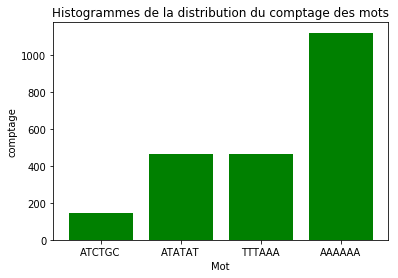

In [32]:
plt.bar(nb_apparition.keys(), nb_apparition.values(), color='g')
plt.title('Histogrammes de la distribution du comptage des mots')
plt.xlabel("Mot")
plt.ylabel("comptage")

### Remarques :
Effectivement on remarque que le mot 'AAAAAA' apparait beaucoup plus souvent que les autres, 'ATCTGC' apparait le moins et cela même si les fréquences sont tirées aléatoirement à chaque simulation. Les nombres d'occurrences de 'ATATAT' et de 'TTTAAA' sont très proches car ils ont la même probabilité, on remarque cependant un léger avantage pour 'TTTAAA'. C’est du au fait qu’il y a des mots qui se chevauchent avec eux-mêmes et où les occurrences ne sont plus du tout indépendantes (si le mot est très chevauchant, on a plus de chances d’en avoir des groupes qui apparaissent) , par exemple si on prend le mot 'AAAAAA'  en réalité ce mot est automatiquement favorisé car il chevauche avec lui-même, puisque il suffit d'une seule lettre 'A' supplémentaire pour compter une autre occurrence (i.e. <font color="GREEN">**AAAAAA**</font><font color="RED">**A**</font>), contrairement à 'ATCTGC' par exemple.

<font size="+1" color="GREEN">**[R]**</font> **Calcule d'un intervalle de confiance pour cette probabilité empirique :**

Soit un mot spécifique "$m$" de longueur "$k$" et un génome de longueur "$l$". En considérant les chevauchement et sans retour en arrière il y'a donc "$l-k+1$" mots de longueur "$k$" dans ce génome.Il s'agit donc de detérminer un intervalle de confiance pour la probabilité que le nombre de mots égaux à "$m$" dans ce génome soit supérieur à un "$n$" spécifique.<br>
* Soit "$e_i$" le mot à examiner parmi les "$l-k+1$" mots, On note par $y_i$ la variable suivante :
$$\begin{cases}y_i &= 1 \quad si \quad m=e_i \\
y_i &= 0 \quad si \quad m \ne e_i
\end{cases}$$ 
$y_i$ suit donc une loi de bernoulli de parametre $P(m)$ 
$$y_i  	\rightarrow	 B(P(m))$$ 
* Soit "$Z$" la variable aléatoire qui dénote le nombre de mots égaux à $m$ trouve, i.e : 
$$Z = \sum_{i=1}^{l-k+1}{y_i}$$
cette variable suit une loi binomiale de parametre $P(m)$ et $l-k+1$ 
$$Z  	\rightarrow	 B(P(m),l-k+1)$$
* Soit la variable $X$ telle que :
$$\begin{cases}X &= 1 \quad si \quad Z \ge n \\
X &= 0 \quad sinon
\end{cases}$$ 
$y_i$ suit donc une loi de bernoulli de parametre $ p = P(X \ge n)$ qui est notre <b>probabilité empirique<b> 
$$X  	\rightarrow	 B(p)$$ 
* Il s'agit de trouver un intervalle de confiance au risque $\alpha$ pour $p$


Soit $X_1,X_2,...,X_s$ un s-échantillon, non gaussien, de variables indépendantes et identiquement distribuées d'ésperance et de variance inconnue:
$$X_i  	\rightarrow	 B(\mu)$$
$\hat{p}_s = \frac{1}{s} \sum_{i=1}^{s}{X_i} \\ E(\hat{p}_s) = E(\frac{1}{s} \sum_{i=1}^{s}{X_i}) = \frac{1}{s} \times E(\sum_{i=1}^{s}{X_i}) = \frac{1}{s} \times \sum_{i=1}^{s}{E(X_i)} = \frac{1}{s} \times s \times \mu = \mu \\ 
V(\hat{p}_s) = V(\frac{1}{s} \sum_{i=1}^{s}{X_i}) = \frac{1}{s^2} \times \sum_{i=1}^{s}{V(X_i)} = \frac{1}{s^2} \times s \times \mu(1-\mu) = \frac{1}{s}\times \mu(1-\mu) \\
\hat{\sigma} = \sqrt{\frac{\hat{p}_s(1-\hat{p}_s)}{s}} $ <br> 
D'aprés le théoreme de la limite centrale on obtient :
$$ \frac{\hat{p}_s - p}{\sqrt{\frac{\hat{p}_s(1-\hat{p}_s)}{s}}} \rightarrow N(0,1)$$
$$P(a \le \frac{\hat{p}_s - p}{\sqrt{\frac{\hat{p}_s(1-\hat{p}_s)}{s}}} \le b) = 1-\alpha$$
Puisque la loi normale est centrée on prend : <br>
$a = -q_{1- \frac{\alpha}{2}}$ (opposé du quantile d'ordre $1-\frac{\alpha}{2}$ de la loi normale centrée réduite) et $b = q_{1- \frac{\alpha}{2}}$ (quantile d'ordre $1-\frac{\alpha}{2}$ de la loi normale centrée réduite)
$$P(-q_{1- \frac{\alpha}{2}} \le \frac{\hat{p}_s - p}{\sqrt{\frac{\hat{p}_s(1-\hat{p}_s)}{s}}} \le q_{1- \frac{\alpha}{2}}) = 1-\alpha$$
$$P(-q_{1- \frac{\alpha}{2}}{\sqrt{\frac{\hat{p}_s(1-\hat{p}_s)}{s}}} \le \hat{p}_s - p \le q_{1- \frac{\alpha}{2}}{\sqrt{\frac{\hat{p}_s(1-\hat{p}_s)}{s}}}) = 1-\alpha$$
$$P(-q_{1- \frac{\alpha}{2}}{\sqrt{\frac{\hat{p}_s(1-\hat{p}_s)}{s}}} + \hat{p}_s \le  p \le q_{1- \frac{\alpha}{2}}{\sqrt{\frac{\hat{p}_s(1-\hat{p}_s)}{s}}} + \hat{p}_s) = 1-\alpha$$
$$IC(p)_{\alpha} = [-q_{1- \frac{\alpha}{2}}{\sqrt{\frac{\hat{p}_s(1-\hat{p}_s)}{s}}} + \hat{p}_s , q_{1- \frac{\alpha}{2}}{\sqrt{\frac{\hat{p}_s(1-\hat{p}_s)}{s}}} + \hat{p}_s]$$

#### Application numérique pour $\alpha = 0,05$ :

In [33]:
import math
for k in dico :
    # l'esperance correspond aux valeurs de la simulation précédante
    esperance = dico[k]
    # on calcule la variance
    variance = math.sqrt((esperance*(1-esperance))/s)
    # on applique la formule et on affiche l'IC
    left = esperance + -1.96*variance
    right  = esperance + 1.96*variance
    print(k," : ","[ ",left," , ",right," ]")

ATCTGC  :  [  -0.0034350953340946816  ,  0.06343509533409468  ]
ATATAT  :  [  0.1562917065040745  ,  0.32370829349592545  ]
TTTAAA  :  [  0.1046992589677897  ,  0.2553007410322103  ]
AAAAAA  :  [  0.19199621826307692  ,  0.36800378173692316  ]


<h1>3.3 Modèles de dinucléotides et trinucléotides :</h1>

<font size="+1" color="GREEN">**[R]**</font> **Est ce que ce modèle correspond à une chaîne de Markov ? :**

Ce modèle correspond effectivement à une chaine de Markov d'ordre 1 :
* Le système comporte 4 états possibles {A,C,T,G}.
* On note par $X_i$ la lettre ajoutée au moment i, $P(X_{n}=j | X_{n-1}=i) = M[i,j]$. La famille $(X_{n})$ forment un processus stochastique qui respecte la propriété de Markov, puisque on ne se base que sur la lettre d'avant. Et la séquence obtenue est la trajectoire probabiliste de ce système.
* Il correspond de plus à une chaine de Markov homogéne car : $\quad \forall n, \quad P(X_n | X_{n-1}) = P(X_1 | X_0)$
* La probabilité stationnaire correspond à la fréquence des nucléotides passées en paramètre.

<font size="+1" color="GREEN">**[R]**</font> **Fonction "simulation_M(sequence)"qui estime M à partir des comptages des mots de longueur 2 :**

In [34]:
matrice_pho = spr.simulation_M(pho)
for ligne in matrice_pho:
    print(ligne)

[0.37067669 0.17744361 0.19924812 0.25263158]
[0.37657431 0.1675063  0.20403023 0.25188917]
[0.29510309 0.27061856 0.17912371 0.25515464]
[0.28207461 0.19563239 0.1910828  0.33121019]


<font size="+1" color="GREEN">**[R]**</font> **Fonction "simulation_dinucleotide(M,frequences,l)" qui simule une séquence de longueur l avec le modèle de dinucléotides :**

On utilisera dans cette fonction, la fonction **"numpy.random.choice(liste de choix possibles, nombre d'éléments à rendre, probabilité de chaque élément)"**

Testons notre fonction en créant une séquence se basant sur PHO :

In [35]:
pho_mime = spr.simulation_dinucleotide(matrice_pho,frequence_pho,len(pho))
print("Comparons les frequences des nucleotides dans les deux :")
print("Frequences de PHO :",frequence_pho)
print("Frequences de l'immitation :",utils.nucleotide_frequency(pho_mime))
print("Comparons les matrices dans les deux :")
print("Matrice de PHO :")
for ligne in matrice_pho:
    print(ligne)
print("Matrice de l'immitation :")
matrice_immitation_pho = spr.simulation_M(pho_mime)
for ligne in matrice_immitation_pho:
    print(ligne)

Comparons les frequences des nucleotides dans les deux :
Frequences de PHO : [0.33275 0.1985  0.194   0.27475]
Frequences de l'immitation : [0.3295  0.1975  0.19525 0.27775]
Comparons les matrices dans les deux :
Matrice de PHO :
[0.37067669 0.17744361 0.19924812 0.25263158]
[0.37657431 0.1675063  0.20403023 0.25188917]
[0.29510309 0.27061856 0.17912371 0.25515464]
[0.28207461 0.19563239 0.1910828  0.33121019]
Matrice de l'immitation :
[0.36949924 0.17298938 0.19954476 0.25796662]
[0.34854246 0.16983523 0.21926489 0.26235741]
[0.30345711 0.26760563 0.16517286 0.2637644 ]
[0.28622862 0.19711971 0.19441944 0.32223222]


<font size="+1" color="GREEN">**[R]**</font> **la probabilité d’apparition d’un mot à une position donnée :**

Soit un génome de longueur $l$ : <br>
Si on a les probabilités des lettres dans le génome (les fréquences) et la matrice de transition, alors la probabilité d'apparition du mot $m$ de longuer $k$ est :<br>
Il suffit d'utiliser la décomposition de la loi jointe dans une chaine de Markov.
$$P(m) = P(m[1]) \times \prod_{i=2}^k P(m[i]|m[i-1])$$
Donc :<br>
$$P(m) = frequncy(1) \times \prod_{i=2}^k M[i-1,i]$$

In [36]:
spr.proba_markov([0,0,3,2,1],frequence_pho,matrice_pho)

0.0016113139041291865

<font size="+1" color="GREEN">**[R]**</font> **Quel est le nombre attendu d’occurrences pour un mot de longueur k avec le
modèle de dinucléotides ? :**


$$P(m) \times (l-k+1) = P(m[0]) \times \prod_{i=1}^k (P(m[i]|m[i-1]) \times (l-k+1)$$

In [37]:
# les clefs du dictionnaire sont les codes des mots et les valeurs sont le nombre d'occurences attendues
dic = spr.comptage_attendu_markov([0.2,0.1,0.3,0.4],matrice_immitation_pho,2,200)
print("la somme des valeurs attendues : ",sum(dic.values()))
print("les valeurs attendues sont : ",dic)

la somme des valeurs attendues :  199.0
les valeurs attendues sont :  {0: 14.706069802731411, 1: 6.884977238239757, 2: 7.941881638846738, 3: 10.267071320182094, 4: 6.935994930291509, 5: 3.3797211660329536, 6: 4.363371356147022, 7: 5.220912547528518, 8: 18.11638924455826, 9: 15.976056338028167, 10: 9.860819462227912, 11: 15.74673495518566, 12: 22.783798379837982, 13: 15.690729072907294, 14: 15.475787578757876, 15: 25.649684968496857}


<font size="+1" color="GREEN">**[R]**</font> **Comparaison du comptage du nombre d’occurrences entre le modèle de nucléotides
et de dinucléotides :**

## GAL

In [38]:
#sequnce_aleatoire_markov = spr.simulation_dinucleotide(spr.simulation_M(gal),utils.nucleotide_frequency(gal),7200) #aleatoirement construite a partir de gal
sequence_aleatoire_markov = gal #gal
# on génere une séquence aléatoire et on recupére ses fréquences et sa taille
frequence_simu_markov = utils.nucleotide_frequency(sequence_aleatoire_markov)
print("frequence : " ,frequence_simu_markov)
taille_simu_markov = len(sequence_aleatoire_markov)
print("taille : ",taille_simu_markov)
print(utils.nucleotide_frequency(gal))

frequence :  [0.30456491 0.20114123 0.18669757 0.30759629]
taille :  5612
[0.30456491 0.20114123 0.18669757 0.30759629]


<Figure size 432x288 with 0 Axes>

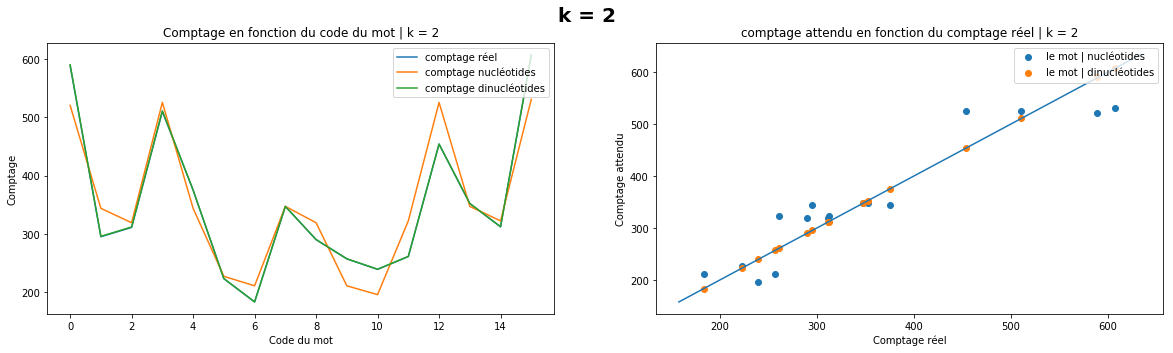

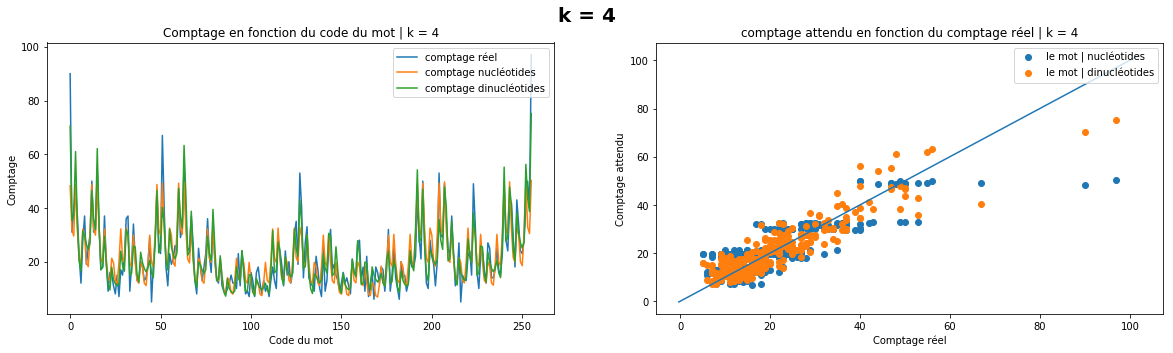

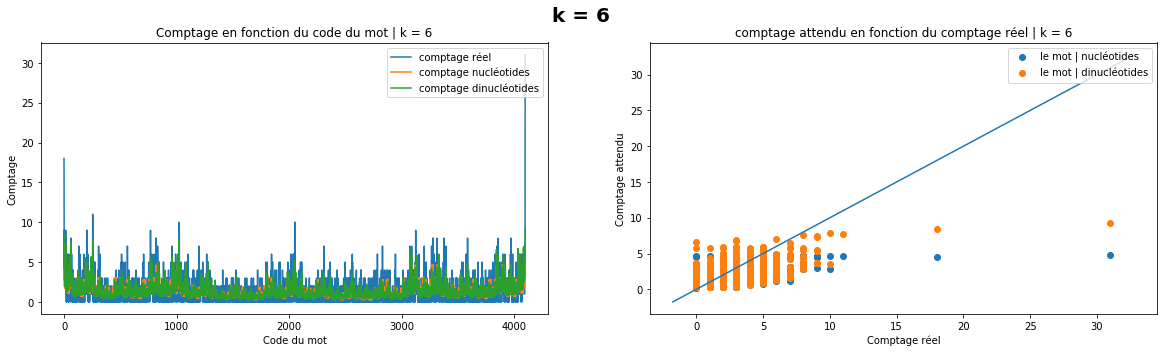

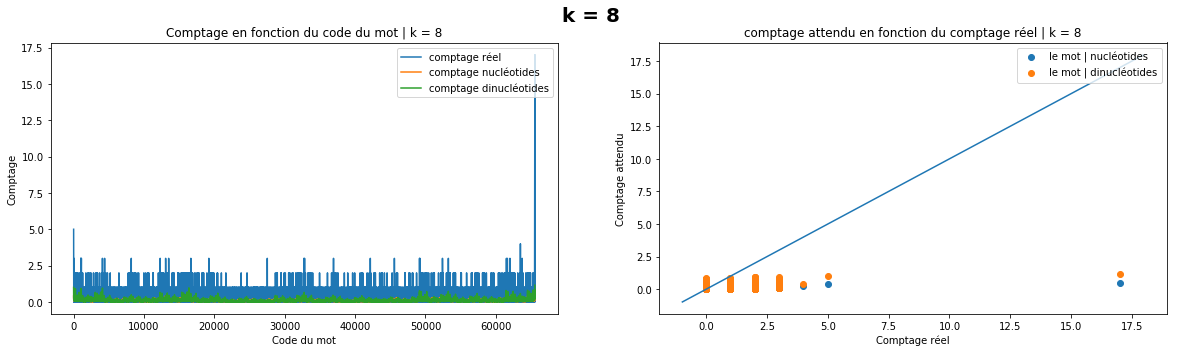

In [39]:
i = 0
# pour chaque valuer de k
for k in [2,4,6,8]:
    # on récupère le comptage réel
    comptage_real = spr.compte_mot(sequence_aleatoire_markov,k)
    # on récupère le comptage attendu pour les deux modéles
    comptage_attendu_nucl = spr.comptage_attendu(frequence_simu_markov,k,taille_simu_markov)
    comptage_attendu_markov = spr.comptage_attendu_markov(frequence_simu_markov,spr.simulation_M(gal),k,taille_simu_markov)
    reel = []
    attendu = []
    markov = []
    mots = []
    # on itére sur les mots pour dessiner les courbes
    for mot in comptage_attendu_nucl:
        mots.append(mot)
        if mot in comptage_real:
            reel.append(comptage_real[mot])
            attendu.append(comptage_attendu_nucl[mot])
            markov.append(comptage_attendu_markov[mot])
        else:
            reel.append(0)
            attendu.append(comptage_attendu_nucl[mot])
            markov.append(comptage_attendu_markov[mot])
    # On dessine les figures
    plt.figure(i)
    plt.figure(figsize=(20,5))
    plt.suptitle("k = "+str(k),fontsize=20, fontweight='bold')
    i+=1
    # plot 1
    p1= plt.subplot(121)
    p1.set_title("Comptage en fonction du code du mot | k = "+str(k))
    p1.set_xlabel("Code du mot")
    p1.set_ylabel("Comptage")
    p1.plot(mots, reel,label ="comptage réel" )
    p1.plot(mots, attendu,label ="comptage nucléotides" )
    p1.plot(mots, markov,label ="comptage dinucléotides" )
    p1.legend(loc = "upper right")
    # plot 2
    p2 = plt.subplot(122)
    p2.set_title("comptage attendu en fonction du comptage réel | k = "+str(k))
    p2.set_xlabel("Comptage réel")
    p2.set_ylabel("Comptage attendu")
    p2.scatter(reel, attendu,label ="le mot | nucléotides" )
    p2.scatter(reel, markov,label ="le mot | dinucléotides" )
    lims = [
    np.min([p2.get_xlim(), p2.get_ylim()]),  # min of both axes
    np.max([p2.get_xlim(), p2.get_ylim()]),  # max of both axes
    ]
    p2.plot(lims,lims)
    p2.legend(loc = "upper right")

### Remarques :

* On remarque que le comptage en utilisant le modèle de dinucléotides est meilleur que celui en utilisant le modèle de nucléotides, ce qui est logique puisque on prend en considération le fait qu’un nucléotide influence le prochain (mémoire d’un nucléotide), comme dans le cas $k = 2$ ou le comptage en utilisant le modèle de dinucléotides épouse parfaitement le comptage réel (logique puisque si $k=2$, on est en train de compter les dinucléotides). Les deux modèles ne fonctionnent pas très bien pour les grandes valeurs de $k$, le modèle de dinucléotide reste meilleur cependant.
* Pour $k=1$ les deux donnent exactement le même résultat puisque dans ce cas, on n'a pas besoin de regarder la liaison entre les lettres.
* Même si le modèle de dinucléotides améliore le résultat, il ne fonctionne pas très bien pour les grandes valeurs de $k$, puisque notre système stochastique respecte la propriété de Markov.

<font size="+1" color="GREEN">**[R]**</font> **En déduire la distribution du nombre d’occurrences quand les mots ne se chevauchent pas et l’appliquer aux séquences de régulation. :**

On considére que tout mot qui contient un dinucléotide qui se répéte, est chevauchant avec lui meme.

In [40]:
spr.detect_mot_chevauchant([0,2,0,3,0,2])

True

### Applicqtion sur les sequences de régulations :

### GAL :

<Figure size 432x288 with 0 Axes>

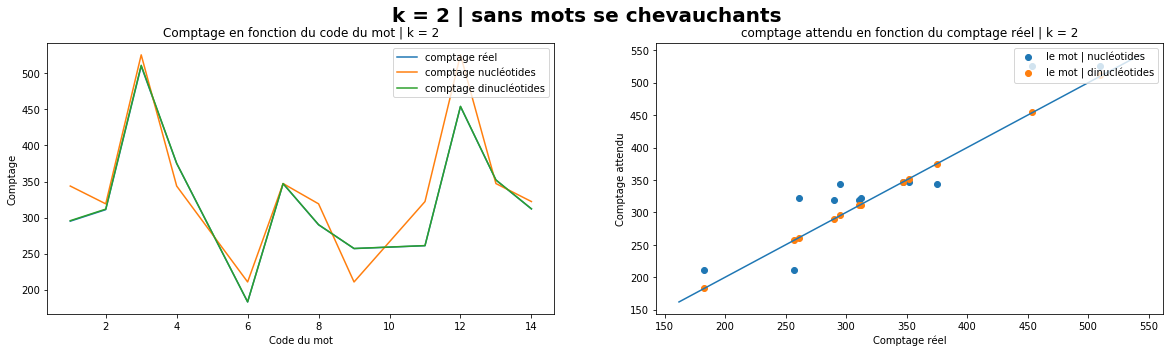

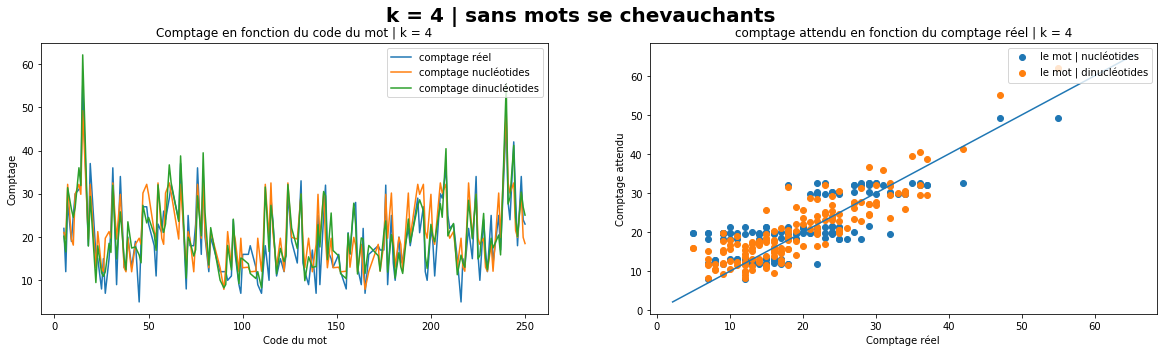

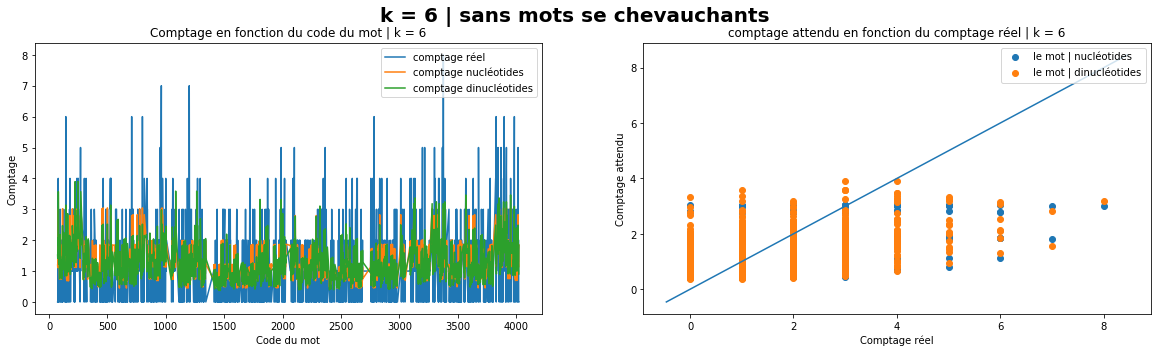

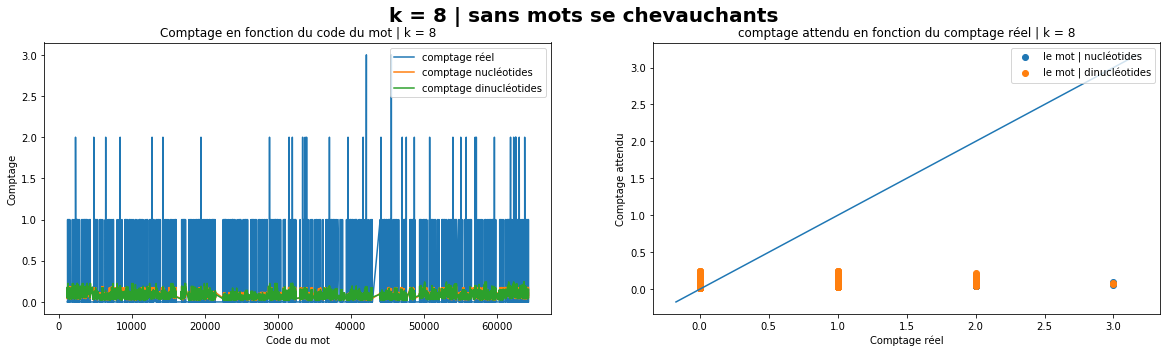

In [41]:
i = 0
# pour chaque valuer de k
for k in [2,4,6,8]:
    # on récupère le comptage réel
    comptage_real = spr.compte_mot(sequence_aleatoire_markov,k)
    # on récupère le comptage attendu pour les deux modéles
    comptage_attendu_nucl = spr.comptage_attendu(frequence_simu_markov,k,taille_simu_markov)
    comptage_attendu_markov = spr.comptage_attendu_markov(frequence_simu_markov,spr.simulation_M(gal),k,taille_simu_markov)
    reel = []
    attendu = []
    markov = []
    mots = []
    # on itére sur les mots pour dessiner les courbes
    for mot in comptage_attendu_nucl:
        if spr.detect_mot_chevauchant(spr.code_inverse(mot,k)) == False:
            mots.append(mot)
            if mot in comptage_real:
                #if comptage_real[mot] > 5:
                #   print(utils.decode_sequence(spr.code_inverse(mot,k)))
                reel.append(comptage_real[mot])
                attendu.append(comptage_attendu_nucl[mot])
                markov.append(comptage_attendu_markov[mot])
            else:
                reel.append(0)
                attendu.append(comptage_attendu_nucl[mot])
                markov.append(comptage_attendu_markov[mot])
    # On dessine les figures
    plt.figure(i)
    plt.figure(figsize=(20,5))
    plt.suptitle("k = "+str(k)+" | sans mots se chevauchants",fontsize=20, fontweight='bold')
    i+=1
    # plot 1
    p1= plt.subplot(121)
    p1.set_title("Comptage en fonction du code du mot | k = "+str(k))
    p1.set_xlabel("Code du mot")
    p1.set_ylabel("Comptage")
    p1.plot(mots, reel,label ="comptage réel" )
    p1.plot(mots, attendu,label ="comptage nucléotides" )
    p1.plot(mots, markov,label ="comptage dinucléotides" )
    p1.legend(loc = "upper right")
    # plot 2
    p2 = plt.subplot(122)
    p2.set_title("comptage attendu en fonction du comptage réel | k = "+str(k))
    p2.set_xlabel("Comptage réel")
    p2.set_ylabel("Comptage attendu")
    p2.scatter(reel, attendu,label ="le mot | nucléotides" )
    p2.scatter(reel, markov,label ="le mot | dinucléotides" )
    lims = [
    np.min([p2.get_xlim(), p2.get_ylim()]),  # min of both axes
    np.max([p2.get_xlim(), p2.get_ylim()]),  # max of both axes
    ]
    p2.plot(lims,lims)
    p2.legend(loc = "upper right")

### Remarques :
Les résultats s'améliorent en termes de différence entre le nombre attendu et le nombre réel (puisque les mots qui chevauchent avec eux-mêmes apparaissent très souvent), cependant même si nous supprimons les mots qui se chevauchent avec eux même, pour les grandes valeurs de $k = 6,8$, ça donne de mauvais résultats donc il existe bel et bien des mots qui apparaissent plus souvent que d'autres et cette fois ci ce n'est pas dû aux chevauchement.

   <h1>3.4 Probabilités de mots :</h1>

In [42]:
import scipy.stats as ss

<font size="+1" color="GREEN">**[R]**</font> **Approximation de la probabilité d’avoir un mot w qui apparait
n fois dans une séquence aléatoire -Loi Binomiale- :**

Soit un mot spécifique "$m$" de longueur "$k$" et un génome de longueur "$l$". En considérant les chevauchement et sans retour en arrière il y'a donc "$l-k+1$" mots de longueur "$k$" dans ce génome.<br>
* Soit "$e_i$" le mot à examiner parmi les "$l-k+1$" mots, On note par $y_i$ la variable suivante :
$$\begin{cases}y_i &= 1 \quad si \quad m=e_i \\
y_i &= 0 \quad si \quad m \ne e_i
\end{cases}$$ 
$y_i$ suit donc une loi de Bernoulli de paramètre $P(m)$ 
$$y_i  	\rightarrow	 B(P(m))$$ 
* Soit "$Z$" la variable aléatoire qui dénote le nombre de mots égaux a $m$ trouve, i.e : 
$$Z = \sum_{i=1}^{l-k+1}{y_i}$$
cette variable suit une loi binomiale de paramètre $P(m)$ et $l-k+1$ 
$$Z  	\rightarrow	 B(P(m),l-k+1)$$


<font size="+1" color="GREEN">**[R]**</font> **Approximation avec une loi de Poisson :**


Pour $(l-k+1) \ge 30, \quad P(m) \le 0.1, \quad (l-k+1) \times P(m) \le 15$ ou $(l-k+1) > 30, \quad P(m) < 0.1$ on aura :
$$B(l-k+1,P(m)) \approx Poisson((l-k+1) \times P(m))$$

<font size="+1" color="GREEN">**[R]**</font> **Comparaison de la distribution de probabilité calculée pour les mots ATCTGC, ATATAT,TTTAAA ou AAAAAA avec l’histogramme de la probabilité empirique :**

Il suffit d'appliquer : <br>
$$P(N \ge n) = 1 - P(N < n) = 1 - \sum_{i = 0}^{n}{P(N = i)} = 1 - \sum_{i = 0}^{n}{Poisson(i,(l-k+1) \times P(m))}$$
En utilisant le modèle de dinucléotides : $$P(m) = P(m[0]) \times \prod_{i=1}^k (P(m[i]|m[i-1]) $$

In [43]:
# on genere une sequence aleatoire
sequence_aleatoire = []
frequences_aleatoires = []
# On genere des fréquences aléatoirement
frequences_aleatoires = [random.random() for i in range(1,5)]
frequences_aleatoires = np.array(frequences_aleatoires)
frequences_aleatoires = frequences_aleatoires / sum(frequences_aleatoires)
#On genre une sequence aleatoire qui correspond à cette fréquence
sequence_aleatoire = spr.simule_sequence(10000, frequences_aleatoires)

# test avec pho
#frequences_aleatoires = frequence_pho
#sequence_aleatoire = pho

# on fixe notre valeur n P(N>=n)
n = 5
words = {'ATCTGC' : 0, 'ATATAT' : 0, 'TTTAAA' : 0,'AAAAAA' : 0}
# pour chacun des mots
for word in words:
    # soit on utilise le modele de nucleotides
    proba = math.exp(spr.logproba(utils.encode_sequence(word), frequences_aleatoires))
    # soit on utilise le modele de dinucleotides
    # proba = spr.proba_markov(utils.encode_sequence(word),frequences_aleatoires,spr.simulation_M(sequence_aleatoire))
    # on applique la formule P(N>=n) = 1-P(N<n)
    for i in range(n):
        words[word] += ss.poisson.pmf(i, (10000-6+1)*(proba), loc=0)
    words[word] = 1-words[word]
print(words)

{'ATCTGC': 3.978208573673925e-08, 'ATATAT': 0.9803633001509441, 'TTTAAA': 0.9803633001509441, 'AAAAAA': 0.5013294345448109}


Text(0, 0.5, 'probabilité empirique')

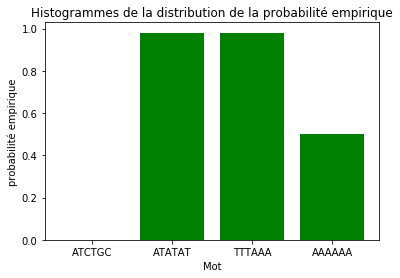

In [44]:
plt.bar(words.keys(), words.values(), color='g')
plt.title('Histogrammes de la distribution de la probabilité empirique')
plt.xlabel("Mot")
plt.ylabel("probabilité empirique")

### Remarques : 
Effectivement on remarque comme précédemment que le mot 'AAAAAA' posséde une probabilité plus élevée que les autres, 'ATCTGC' en a la plus faible. Les probabilités de 'ATATAT' et de 'TTTAAA' sont très proches car ils ont la même probabilité, on remarque cependant un léger avantage pour 'TTTAAA'. C’est dû au fait qu’il y a des mots qui se chevauchent avec eux-mêmes et où les occurrences ne sont plus du tout indépendantes (si le mot est très chevauchant, on a plus de chances d’en avoir des groupes qui apparaissent) , par exemple si on prend le mot 'AAAAAA'  en réalité ce mot est automatiquement favorisé car il chevauche avec lui-même, puisque il suffit d'une seule lettre 'A' supplémentaire pour compter une autre occurrence (i.e. <font color="GREEN">**AAAAAA**</font><font color="RED">**A**</font>), contrairement à 'ATCTGC' par exemple.


<font size="+1" color="GREEN">**[R]**</font> **Fonction qui, à partir de la liste des comptages des mots de taille k et de
la longueur de la séquence, calcul leur probabilité d’occurrence $P(N_w \le n_w)$ avec la
formule analytique :**


Dans ce cas le parametre de la loi binomiale change, il est propre a chaque mot. Pour un mot $w$ specifique :
$$y_i  	\rightarrow	 B(P(m))$$ 
avec $P(m) = \frac{nb\_occ(w)}{l-k+1}$ <br>
et donc 
$$X \rightarrow B(P(m),l-k+1)$$
et donc 
$$B(l-k+1,P(m)) \approx Poisson((l-k+1) \times P(m)) \approx Poisson(nb\_occ(w))$$
et dans ce cas on considère les chevauchement, c'est à dire que pour une chaine aléatoire injectée a cet algorithme, les mots qui chevauchent avec eux-mêmes seront favorisés.

In [45]:
n = 3
genome_aleatoire = []
frequences_alea = []
# On genere des frequences aleatoirement
frequences_alea = [random.random() for i in range(1,5)]
frequences_alea = np.array(frequences_alea)
frequences_alea = frequences_alea / sum(frequences_alea)
#On genre une sequence aleatoire qui correspond a cette frequence
genome_aleatoire = spr.simule_sequence(10000, frequences_alea) 
#on recupere le comptage des mots de longeur 6
count_dico = spr.compte_mot(genome_aleatoire, 6)
#on estime la proba empirique avec la fonction realisee
proba_dico = spr.estime_proba_empirique(count_dico,10000,6,n)
words_compare = {'ATCTGC' : 0, 'ATATAT' : 0, 'TTTAAA' : 0,'AAAAAA' : 0}
words_compare_cout =  {'ATCTGC' : 0, 'ATATAT' : 0, 'TTTAAA' : 0,'AAAAAA' : 0}
# on slectionne les mots que nous voulons
for word in words_compare:
    inter  = utils.encode_sequence(word)
    inter = spr.code(inter,6)
    words_compare[word] = proba_dico[inter]
    if inter in count_dico:
        words_compare_cout[word] = count_dico[inter]
    else :
        words_compare_cout[word] = 0
# on affiche la probabilté empirique 
print("la probabilté empirique : \n",words_compare)
# on affiche le comptage des mots
print("le comptage : \n",words_compare_cout)

la probabilté empirique : 
 {'ATCTGC': 0.0, 'ATATAT': 0.08030139707139416, 'TTTAAA': 0.0, 'AAAAAA': 0.08030139707139416}
le comptage : 
 {'ATCTGC': 0, 'ATATAT': 1, 'TTTAAA': 0, 'AAAAAA': 1}


<font size="+1" color="GREEN">**[R]**</font> **Les mots qui apparaissent significativement plus qu’attendu pour k = 2, 4, 6 pour PHO :**

* On fixe un seuil de coupure, si la probabilité empirique du mot surpasse ce seuil pour un certain $n$, on considère qu'il s'agit d'une séquence de fixation.
* On détermine le seuil de coupure à partir des graphes en comparant la probabilité $P(N_w \le n_w)$ estimée et réelle.

<Figure size 432x288 with 0 Axes>

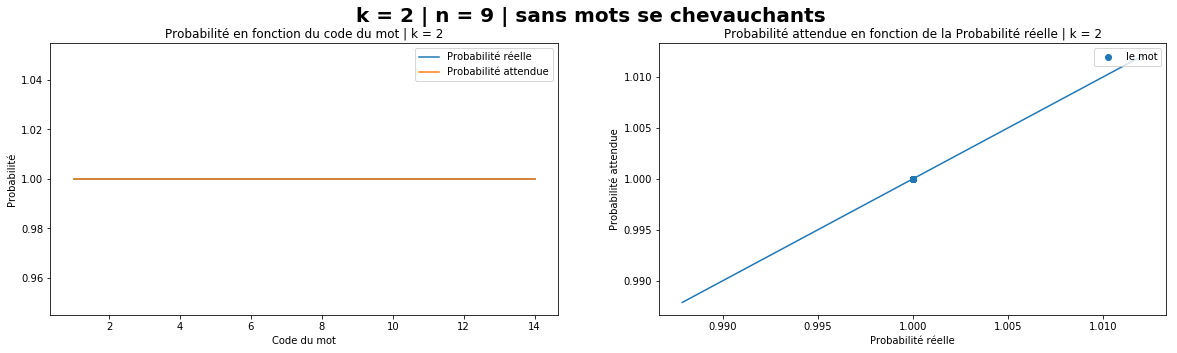

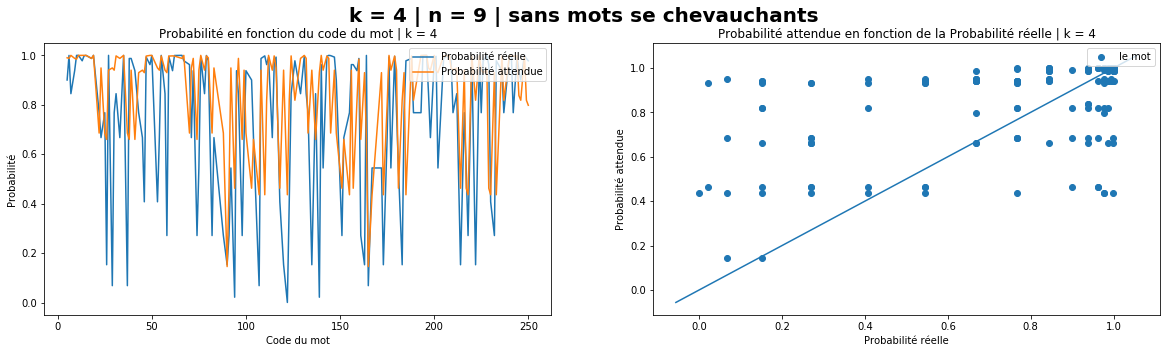

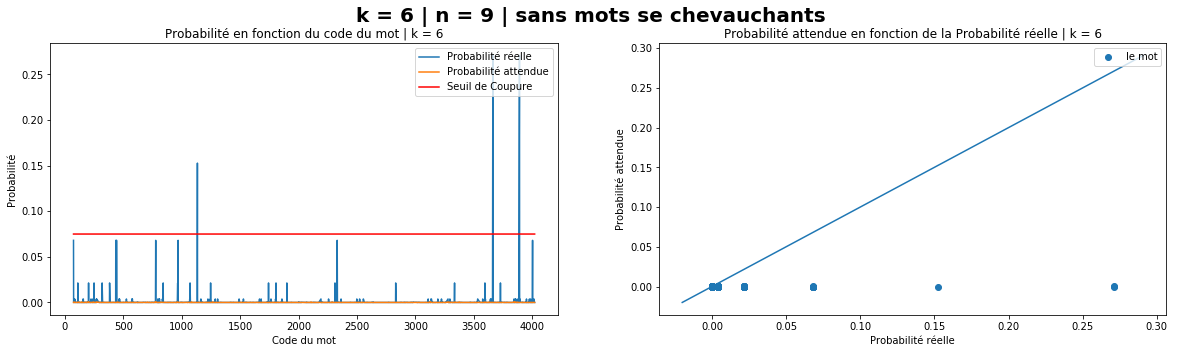

In [46]:
i = 0
n =9
# le seuil de coupure
seuil = 0.075
fixations_sites = {}
# pour chaque valuer de k
for k in [2,4,6]:
    count_dico = spr.compte_mot(pho,k)
    naive = []
    real = []
    mots = []
    naive_dico = spr.estime_proba_empirique_naive(len(pho),k,n,frequence_pho)
    real_dico = spr.estime_proba_empirique(count_dico,len(pho),k,n)
    for word in naive_dico:
        if spr.detect_mot_chevauchant(spr.code_inverse(word,k)) == False:
            mots.append(word)
            naive.append(naive_dico[word])
            real.append(real_dico[word])
            # on selectionne les sequences de fixations en fixant un seuil de coupure 
            # ce seuil de coupure est deduit du graphe
            if k==6 and real_dico[word]>seuil:
                fixations_sites[word] = count_dico[word]
    # On dessine les figures
    plt.figure(i)
    plt.figure(figsize=(20,5))
    plt.suptitle("k = "+str(k)+" | n = "+str(n)+" | sans mots se chevauchants",fontsize=20, fontweight='bold')
    i+=1
    # plot 1
    p1= plt.subplot(121)
    p1.set_title("Probabilité en fonction du code du mot | k = "+str(k))
    p1.set_xlabel("Code du mot")
    p1.set_ylabel("Probabilité")
    p1.plot(mots, real,label ="Probabilité réelle" )
    p1.plot(mots, naive,label ="Probabilité attendue" )
    if k==6:
        p1.plot(mots,[seuil for i in range(len(mots))],label="Seuil de Coupure",color="red")
    p1.legend(loc = "upper right")
    # plot 2
    p2 = plt.subplot(122)
    p2.set_title("Probabilité attendue en fonction de la Probabilité réelle | k = "+str(k))
    p2.set_xlabel("Probabilité réelle")
    p2.set_ylabel("Probabilité attendue")
    p2.scatter(real, naive,label ="le mot" )
    lims = [
    np.min([p2.get_xlim(), p2.get_ylim()]),  # min of both axes
    np.max([p2.get_xlim(), p2.get_ylim()]),  # max of both axes
    ]
    p2.plot(lims,lims)
    p2.legend(loc = "upper right")

### D'aprés les calculs de probabilité ci-dessus les sites de fixation sont :

Pour $k = 6$, on fixe le seuil de coupure à $0.1$

In [47]:
for i in fixations_sites:
    fixations_sites[utils.decode_sequence(spr.code_inverse(int(i),6))] = fixations_sites.pop(i)

Text(0, 0.5, 'Comptage')

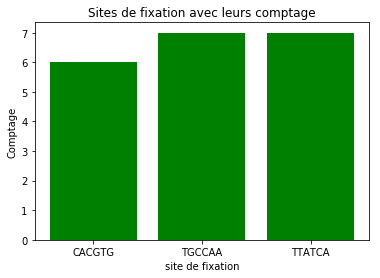

In [48]:
plt.bar(fixations_sites.keys(), fixations_sites.values(), color='g')
plt.title('Sites de fixation avec leurs comptage')
plt.xlabel("site de fixation")
plt.ylabel("Comptage")

<h1>4 Conclusion </h1>

$\quad$ Nous nous sommes intéressés dans ce projet à la détection de sites de fixations dans un génome, un problème couteux et qui prend beaucoup de temps si on le résout avec des expériences biologiques. Grâce aux outils statistiques et informatiques à notre portée, nous avons été capables de mettre en place deux modèles pour analyser ces séquences, et de mener par la suite une série de simulations pour les tester et vérifier nos résultats.

In [49]:
!jupyter nbconvert --to html Projet-3_3I005_Merrouche_Sidhoum.ipynb

[NbConvertApp] Converting notebook Projet-3_3I005_Merrouche_Sidhoum.ipynb to html
[NbConvertApp] Writing 984975 bytes to Projet-3_3I005_Merrouche_Sidhoum.html
